In [144]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import cv2

In [145]:
base_dir = 'Dataset/chest_xray'
train_path = os.path.join(base_dir, 'train')
val_path = os.path.join(base_dir, 'val')
test_path = os.path.join(base_dir, 'test')

Images have been split in training, validation and test datasets. Each dataset has two folders corresponding to two image categories `NORMAL` and `PNEUMONIA`.

In [146]:
train_neg = glob(os.path.join(train_path, 'NORMAL/*.jpeg'))
train_pos = glob(os.path.join(train_path, 'PNEUMONIA/*.jpeg'))
val_neg = glob(os.path.join(val_path, 'NORMAL/*.jpeg'))
val_pos = glob(os.path.join(val_path, 'PNEUMONIA/*.jpeg'))
test_neg = glob(os.path.join(test_path, 'NORMAL/*.jpeg'))
test_pos = glob(os.path.join(test_path, 'PNEUMONIA/*.jpeg'))

## Extract image properties

In [147]:
def extract_image_properties(image_paths):
    data = []
    for img_path in image_paths: 
        img = cv2.imread(img_path)
        properties = {
            'path': img_path,
            'label': img_path.split('/')[-2],
            'dataset': img_path.split('/')[-3],
            'max': img.max(),
            'min': img.min(),
            'mean': img.mean(),
            'std': img.std(),
            'height': img.shape[0],
            'width': img.shape[1]
        }
        data.append(properties)

    df_img = pd.DataFrame(data)
    
    return df_img

In [148]:
df_train_neg = extract_image_properties(train_neg)
df_train_pos = extract_image_properties(train_pos)
df_val_neg = extract_image_properties(val_neg)
df_val_pos = extract_image_properties(val_pos)
df_test_neg = extract_image_properties(test_neg)
df_test_pos = extract_image_properties(test_pos)

df_all = pd.concat([df_train_neg, df_train_pos, df_val_neg, df_val_pos, df_test_neg, df_test_pos])

In [149]:
df_all.to_csv('Dataset/processed/chest_xray_images_properties.csv', index=False)
# df_all = pd.read_csv('Dataset/processed/chest_xray_images_properties.csv')

## Exploratory Data Analysis (EDA)

In [150]:
df_all = pd.read_csv('Dataset/processed/chest_xray_images_properties.csv')
df_all.head()

,path,label,dataset,max,min,mean,std,height,width
0,Dataset/chest_xray/train/NORMAL/NORMAL2-IM-092...,NORMAL,train,255,0,124.391030,56.330762,2234,2359
1,Dataset/chest_xray/train/NORMAL/NORMAL2-IM-105...,NORMAL,train,255,0,115.710751,56.844688,1067,1422
2,Dataset/chest_xray/train/NORMAL/IM-0427-0001.jpeg,NORMAL,train,255,0,133.991183,65.503709,1357,1828
3,Dataset/chest_xray/train/NORMAL/NORMAL2-IM-126...,NORMAL,train,255,0,111.488999,68.965235,1495,1854
4,Dataset/chest_xray/train/NORMAL/IM-0656-0001-0...,NORMAL,train,255,0,148.148118,60.029570,1966,2194


In [151]:
df_all.describe()

,max,min,mean,std,height,width
count,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000
mean,252.759563,0.212090,122.786271,56.989903,970.689037,1327.880806
std,10.627402,2.775167,18.391648,9.396742,383.392117,363.500922
min,153.000000,0.000000,58.722966,20.415354,127.000000,384.000000
25%,255.000000,0.000000,111.616378,50.736895,688.000000,1056.000000
50%,255.000000,0.000000,122.753346,57.328348,888.000000,1281.000000
75%,255.000000,0.000000,134.313617,63.696503,1187.000000,1560.000000
max,255.000000,76.000000,221.536623,87.480423,2713.000000,2916.000000


There are no extremely dark (max<30) or bright (min>255) images. All X-Ray images pass the quality control.

### Pixel Intensity Distribution

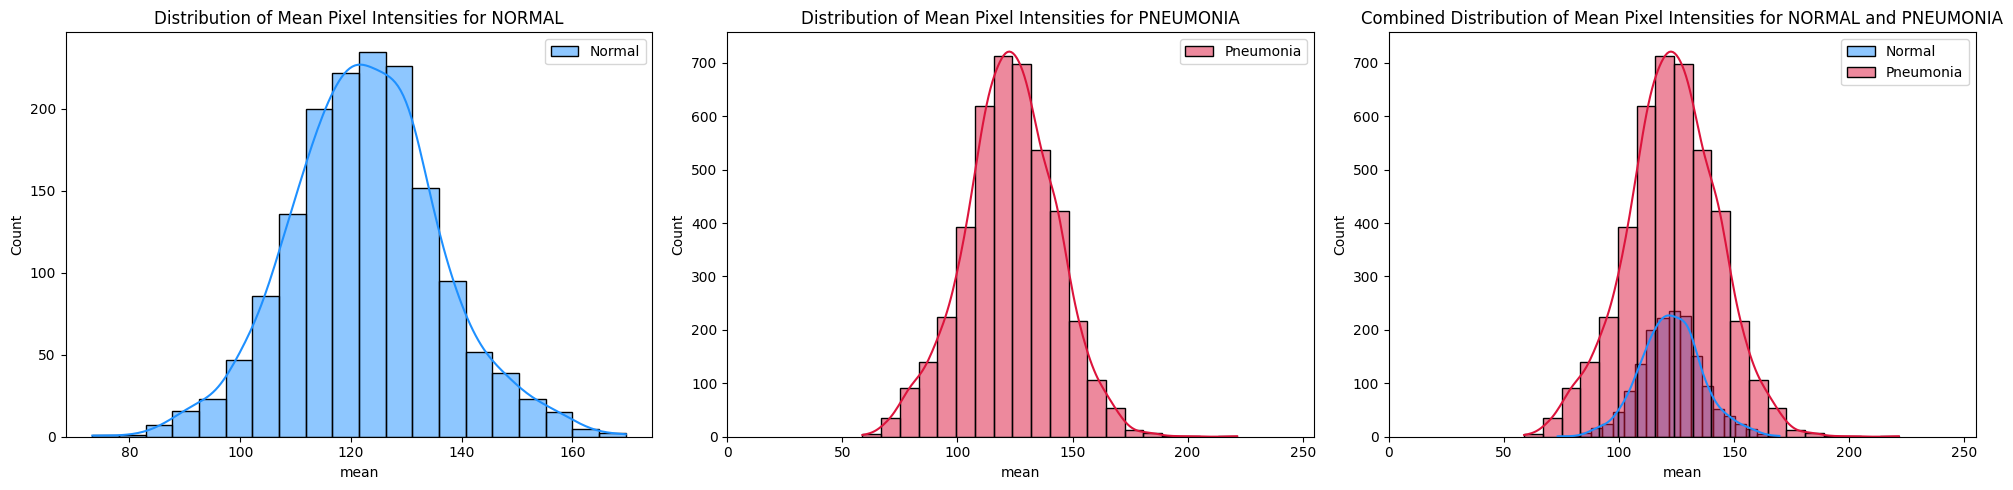

In [152]:
fig, ax = plt.subplots(1,3, figsize=(20,5))

# Normal
sns.histplot(df_all[df_all['label'] == 'NORMAL'], x='mean', bins=20, kde=True, label='Normal', color='dodgerblue', ax = ax[0])
ax[0].legend()
ax[0].set_title('Distribution of Mean Pixel Intensities for NORMAL')

# Pneumonia
sns.histplot(df_all[df_all['label'] == 'PNEUMONIA'], x='mean', bins=20, kde=True, label = 'Pneumonia', color='crimson', ax = ax[1])
ax[1].legend()
ax[1].set_title('Distribution of Mean Pixel Intensities for PNEUMONIA')

# Both
sns.histplot(df_all[df_all['label'] == 'NORMAL'], x='mean', bins=20, kde=True, label='Normal', color='dodgerblue', ax = ax[2])
sns.histplot(df_all[df_all['label'] == 'PNEUMONIA'], x='mean', bins=20, kde=True, label = 'Pneumonia', color='crimson', ax = ax[2])
ax[2].legend()
ax[2].set_title('Combined Distribution of Mean Pixel Intensities for NORMAL and PNEUMONIA')

for axis in ax[1:]:
    axis.set_xlim(0, 255)

plt.tight_layout()
plt.show()

The average pixel intensity in X-Ray images of both NORMAL and 'PNEUMONIA' classes follows a normal distribution with similar mean values (+-125). 

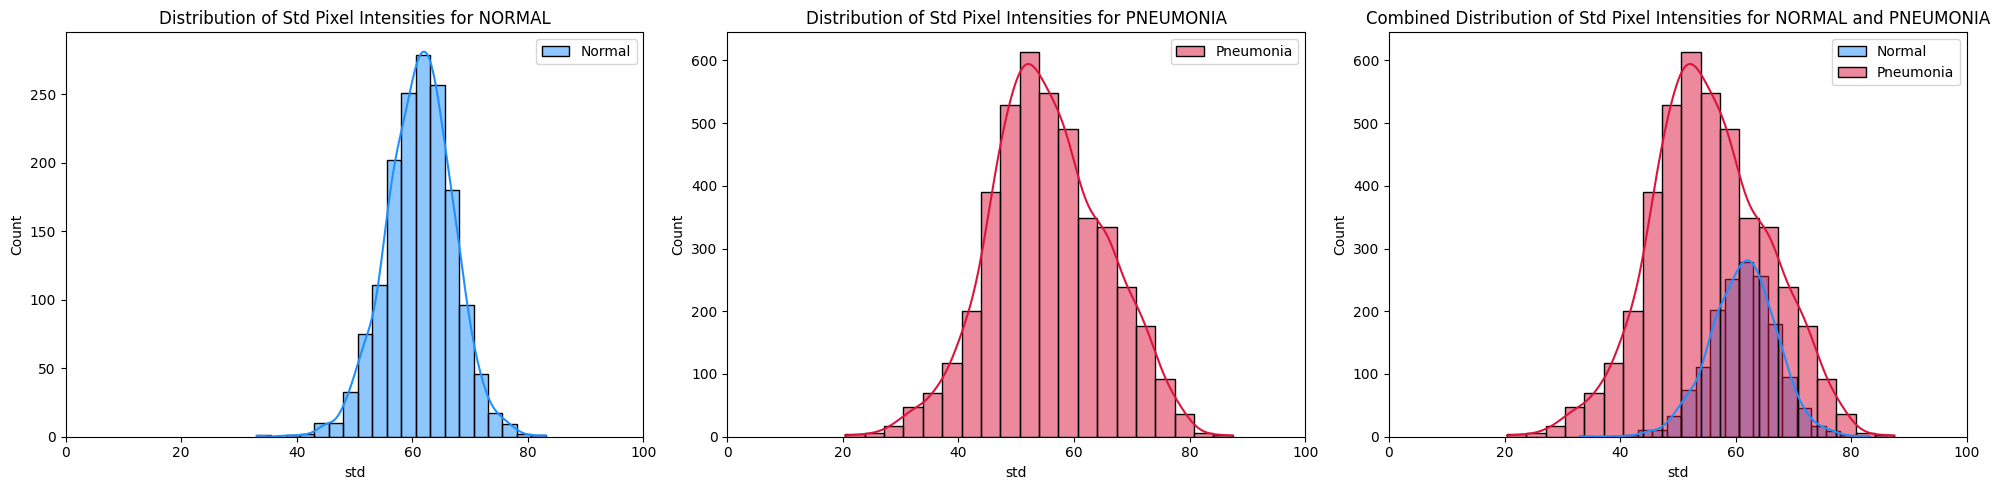

In [153]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

# Normal
sns.histplot(df_all[df_all['label'] == 'NORMAL'], x='std', bins=20, kde=True, label='Normal', color='dodgerblue', ax=ax[0])
ax[0].legend()
ax[0].set_title('Distribution of Std Pixel Intensities for NORMAL')

# Pneumonia
sns.histplot(df_all[df_all['label'] == 'PNEUMONIA'], x='std', bins=20, kde=True, label='Pneumonia', color='crimson', ax=ax[1])
ax[1].legend()
ax[1].set_title('Distribution of Std Pixel Intensities for PNEUMONIA')

# Both
sns.histplot(df_all[df_all['label'] == 'NORMAL'], x='std', bins=20, kde=True, label='Normal', color='dodgerblue', ax=ax[2])
sns.histplot(df_all[df_all['label'] == 'PNEUMONIA'], x='std', bins=20, kde=True, label='Pneumonia', color='crimson', ax=ax[2])
ax[2].legend()
ax[2].set_title('Combined Distribution of Std Pixel Intensities for NORMAL and PNEUMONIA')

for axis in ax:
    axis.set_xlim(0, 100)

plt.tight_layout()
plt.show()


PNEUMONIA images have a higher standard deviation compared to NORMAL images - this variation is indicative of the presence of white spots (infiltrates) in the lungs affected by pneumonia, signaling the infection.

Overall, this suggests that normal lungs display a more consistent pixel intensity pattern compared to those affected by pneumonia, as reflected in the higher variation in average intensity.

### Image Dimensions

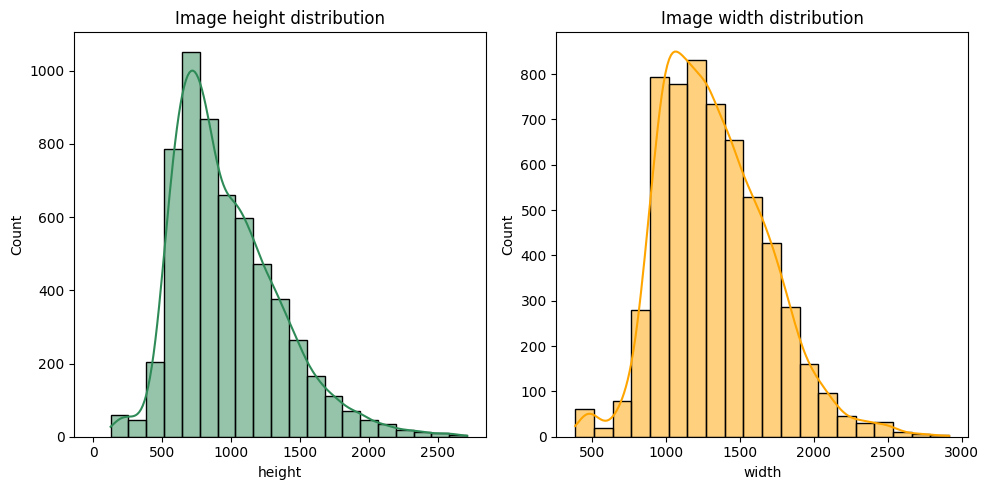

In [154]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.histplot(df_all, x='height', bins=20, kde=True, color='seagreen', ax=ax[0])
sns.histplot(df_all, x='width', bins=20, kde=True, color='orange', ax=ax[1])
ax[0].set_title('Image height distribution')
ax[1].set_title('Image width distribution')

sns.histplot(df_all[df_all['dataset'] == 'NORMAL'], x='mean', bins=20, kde=True, label='Normal', color='dodgerblue', ax = ax[0])
    
plt.tight_layout()
plt.show()

Analyzing the width and height of images in both the train and test datasets is crucial because it ensures consistency in image dimensions, guides preprocessing steps and data augmentation techniques, and informs the design of the model architecture. This helps improve model performance and generalization.

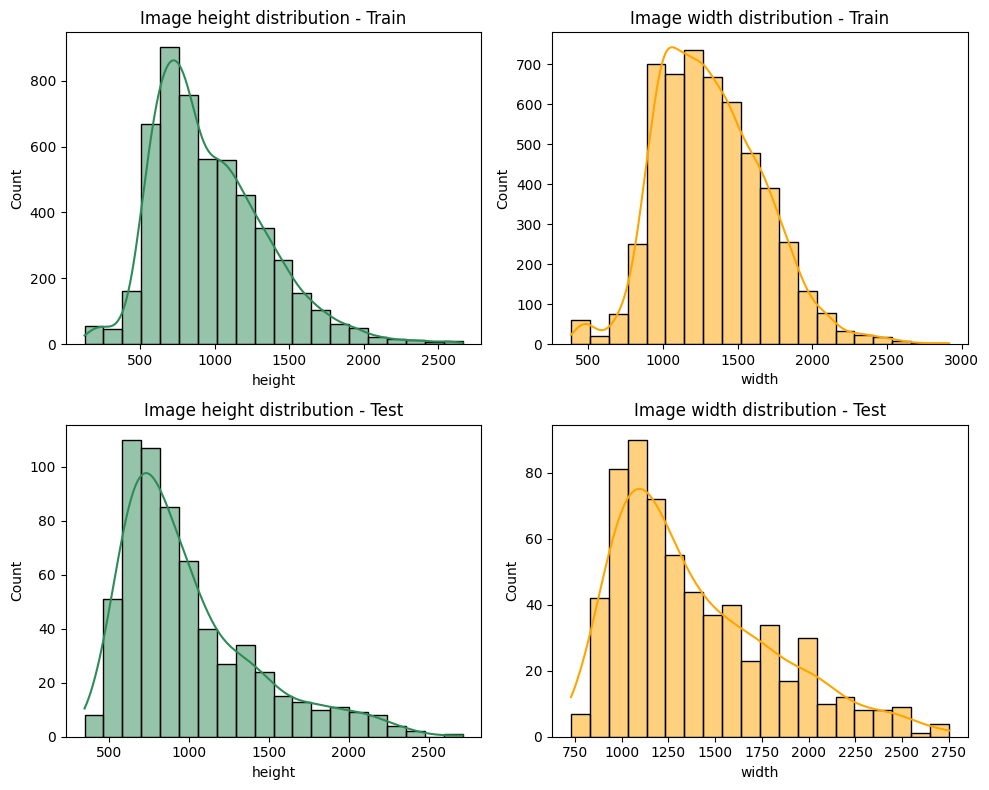

In [155]:
fig, ax = plt.subplots(2,2, figsize=(10, 8))

sns.histplot(df_all[df_all['dataset'] == 'train'], x='height', bins=20, kde=True, color='seagreen', ax = ax[0, 0])
ax[0, 0].set_title('Image height distribution - Train')

sns.histplot(df_all[df_all['dataset'] == 'train'], x='width', bins=20, kde=True, color='orange', ax = ax[0, 1])
ax[0, 1].set_title('Image width distribution - Train')

sns.histplot(df_all[df_all['dataset'] == 'test'], x='height', bins=20, kde=True, color='seagreen', ax = ax[1, 0])
ax[1, 0].set_title('Image height distribution - Test')

sns.histplot(df_all[df_all['dataset'] == 'test'], x='width', bins=20, kde=True, color='orange', ax = ax[1, 1])
ax[1, 1].set_title('Image width distribution - Test')

plt.tight_layout()
plt.show()

### Train-Val-Test split distribution

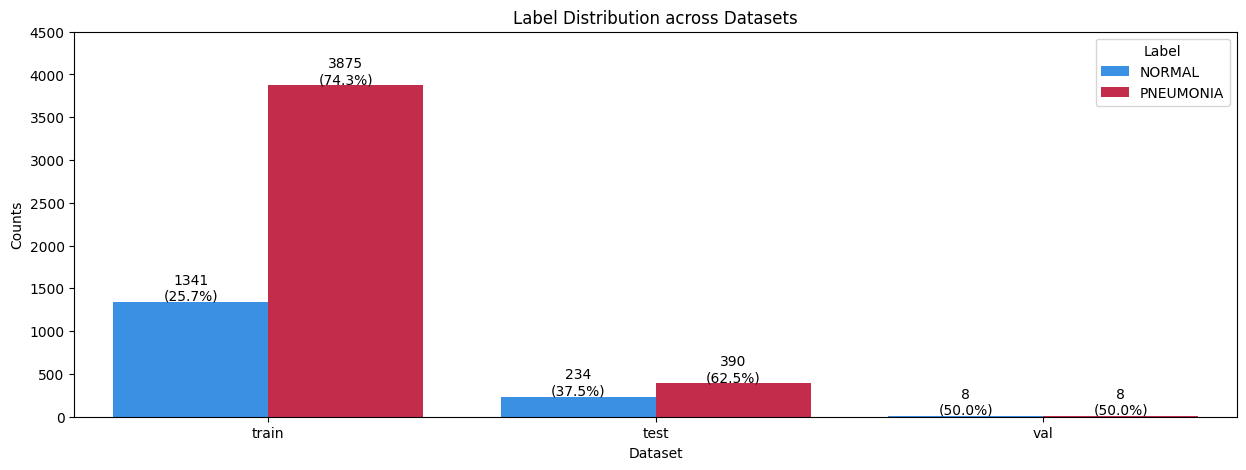

In [156]:
df_distribution = df_all.groupby(['label'])['dataset'].value_counts().reset_index(name='counts')

plt.figure(figsize=(15, 5))
barplot = sns.barplot(data=df_distribution, x='dataset', y='counts', hue='label', palette=['dodgerblue', 'crimson'])
for p, total, count in zip(barplot.patches, df_distribution.groupby('dataset')['counts'].transform('sum'), df_distribution['counts']):
    percentage = 100 * count / total
    annotation_text = f"{count}\n({percentage:.1f}%)"
    plt.annotate(annotation_text, (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Label Distribution across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Counts')
plt.ylim([0, 4500])
plt.legend(title='Label')
plt.show()

There's an imbalance in the number of images between these classes, with more 'PNEUMONIA' images than 'NORMAL' images in both training and testing datasets. 

The ratio of 'NORMAL' to 'PNEUMONIA' images varies across training, validation, and test sets: 
- training: 1:3
- validation: 1:1
- test: 1:1,67

Moreover, the validation set contains only 16 images - this small size could potentially lead to unreliable performance estimates, as the validation set may not adequately represent the variability and complexity of the overall dataset. Additionally, such a small validation set might introduce bias in the evaluation, favoring the performance on a limited subset of the data.

Thus, the training data needs to stratified into training and validaiton sets and the ratio of classes should be kept equal in each dataset to achieve consistent prediction performance scores.

### Visual Inspection of Images

Visualize 5 random images from each class.

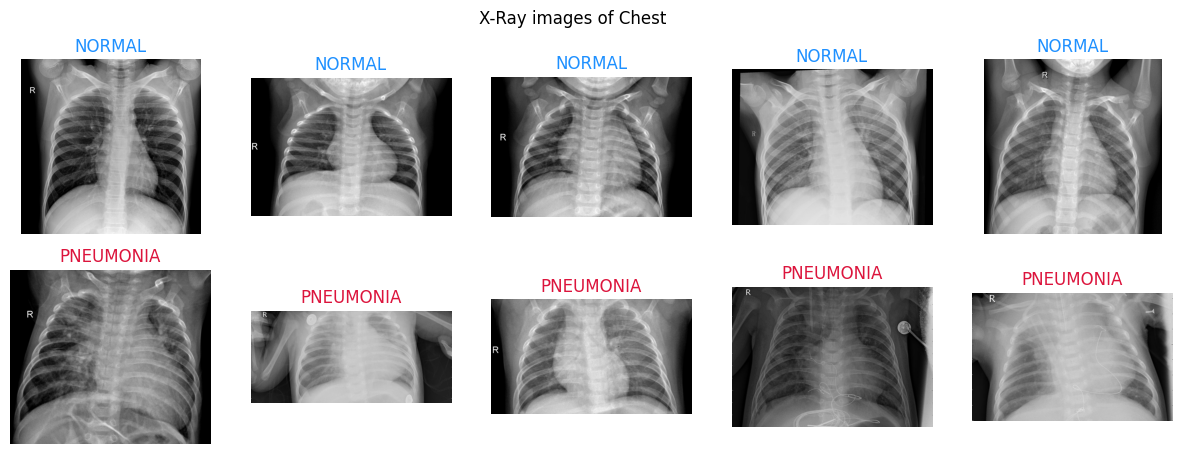

In [157]:
normal_samples = df_all[df_all['label'] == 'NORMAL'].sample(n=5, random_state=None)
pneumonia_samples = df_all[df_all['label'] == 'PNEUMONIA'].sample(n=5, random_state=None)

fig, axes = plt.subplots(2, 5, figsize=(15, 5))

for ax, sample in zip(axes.ravel(), normal_samples['path']):
    img = cv2.imread(sample, cv2.IMREAD_GRAYSCALE)
    ax.imshow(img, cmap='gray')
    ax.set_title('NORMAL', color='dodgerblue')
    ax.axis('off')

for ax, sample in zip(axes.ravel()[5:], pneumonia_samples['path']):
    img = cv2.imread(sample, cv2.IMREAD_GRAYSCALE)
    ax.imshow(img, cmap='gray')
    ax.set_title('PNEUMONIA', color='crimson')
    ax.axis('off')

plt.suptitle('X-Ray images of Chest')
plt.show()